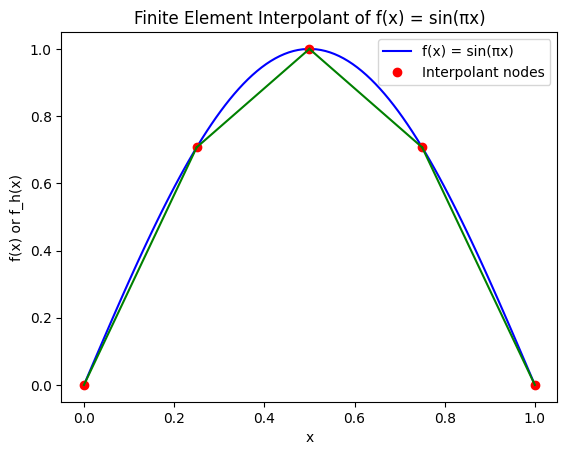

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sin(pi * x)
def f(x):
    return np.sin(np.pi * x)

# Define mesh points
x_nodes = np.linspace(0, 1, 5)  # 5 nodes from 0 to 1 for a uniform four-element mesh
f_values = f(x_nodes)

# Plot the original function and the finite element interpolant
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), label='f(x) = sin(πx)', color='blue')
plt.plot(x_nodes, f_values, 'o', color='red', label='Interpolant nodes')

# Piecewise linear interpolant
for i in range(len(x_nodes) - 1):
    plt.plot([x_nodes[i], x_nodes[i+1]], [f_values[i], f_values[i+1]], color='green')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x) or f_h(x)')
plt.title('Finite Element Interpolant of f(x) = sin(πx)')
plt.show()


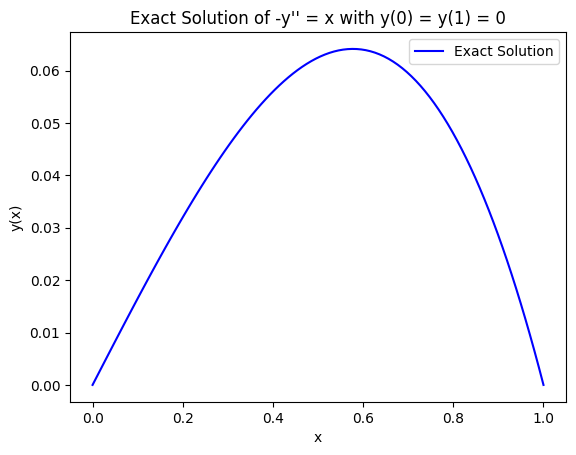

In [2]:
# Define the exact solution
def y_exact(x):
    return -x**3 / 6 + x / 6

# Plot the exact solution
x = np.linspace(0, 1, 100)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact Solution of -y\'\' = x with y(0) = y(1) = 0')
plt.legend()
plt.show()


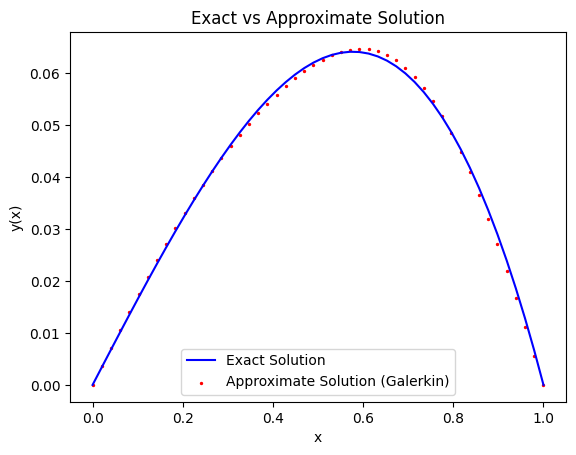

In [37]:
from scipy.integrate import quad

# Basis functions and their derivatives
def phi(i, x):
    return np.sin(i * np.pi * x)

def dphi(i, x):
    return i * np.pi * np.cos(i * np.pi * x)

# Define the stiffness matrix K and load vector f
N = 3
K = np.zeros((N, N))
f_vec = np.zeros(N)

# Calculate K_ij
for i in range(1, N + 1):
    for j in range(1, N + 1):
        K[i - 1, j - 1] = quad(lambda x: dphi(i, x) * dphi(j, x), 0, 1)[0]

# Calculate f_i
for i in range(1, N + 1):
    f_vec[i - 1] = quad(lambda x: x * phi(i, x), 0, 1)[0]

# Solve for coefficients c
c = np.linalg.solve(K, f_vec)

# Define the approximate solution yh(x)
def y_approx(x):
    return sum(c[i - 1] * phi(i, x) for i in range(1, N + 1))

# Plot the exact and approximate solutions
x = np.linspace(0, 1, 50)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.scatter(x, [y_approx(xi) for xi in x], marker  = "o", s = 2,label='Approximate Solution (Galerkin)', color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact vs Approximate Solution')
plt.legend()
plt.show()


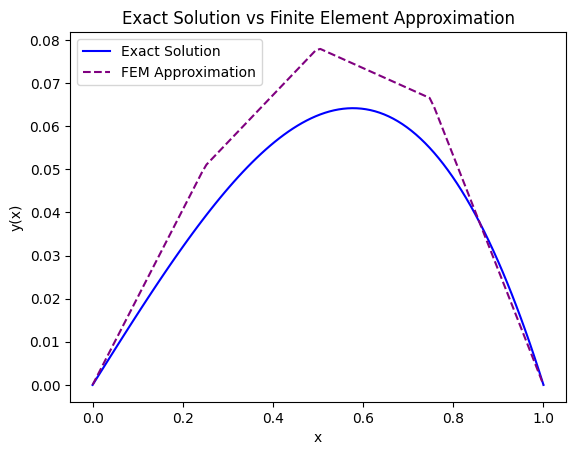

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution for reference
def y_exact(x):
    return -x**3 / 6 + x / 6

# Define nodes and elements
x_nodes = np.linspace(0, 1, 5)  # Four elements, mesh size h = 0.25
num_nodes = len(x_nodes)
num_elements = num_nodes - 1

# Define piecewise linear basis functions and their derivatives
def basis_functions(x, i, x_nodes):
    h = x_nodes[1] - x_nodes[0]
    if i == 0:
        return (x_nodes[1] - x) / h if x_nodes[0] <= x <= x_nodes[1] else 0
    elif i == 1:
        return (x - x_nodes[0]) / h if x_nodes[0] <= x <= x_nodes[1] else (x_nodes[2] - x) / h if x_nodes[1] <= x <= x_nodes[2] else 0
    elif i == 2:
        return (x - x_nodes[1]) / h if x_nodes[1] <= x <= x_nodes[2] else (x_nodes[3] - x) / h if x_nodes[2] <= x <= x_nodes[3] else 0
    elif i == 3:
        return (x - x_nodes[2]) / h if x_nodes[2] <= x <= x_nodes[3] else (x_nodes[4] - x) / h if x_nodes[3] <= x <= x_nodes[4] else 0
    elif i == 4:
        return (x - x_nodes[3]) / h if x_nodes[3] <= x <= x_nodes[4] else 0
    else:
        return 0

# Compute stiffness matrix K and load vector f
K = np.zeros((num_nodes, num_nodes))
f = np.zeros(num_nodes)

# Populate K and f by integration over each element
h = 0.25
for i in range(1, num_nodes - 1):
    K[i, i] = 2 / h
    K[i, i-1] = -1 / h
    K[i, i+1] = -1 / h
    f[i] = h * (x_nodes[i] + x_nodes[i+1]) / 2  # Approximation of integral of x * phi

# Adjust K and f for boundary conditions
K = K[1:-1, 1:-1]  # Remove rows/columns for y(0)=y(1)=0
f = f[1:-1]

# Solve the linear system K * c = f
c = np.linalg.solve(K, f)

# Approximate solution yh
def y_fem(x):
    return sum(c[i-1] * basis_functions(x, i, x_nodes) for i in range(1, num_nodes - 1))

# Plot exact and FEM solutions
x = np.linspace(0, 1, 100)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.plot(x, [y_fem(xi) for xi in x], label='FEM Approximation', color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title('Exact Solution vs Finite Element Approximation')
plt.show()


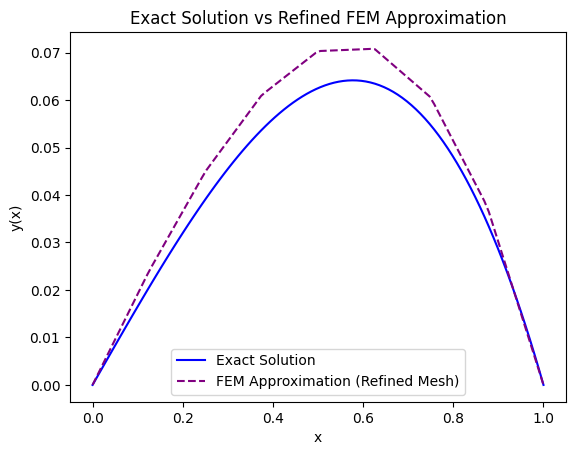

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution for reference
def y_exact(x):
    return -x**3 / 6 + x / 6

# Define nodes and elements for finer mesh
num_elements = 8
x_nodes = np.linspace(0, 1, num_elements + 1)  # 8 elements -> 9 nodes
num_nodes = len(x_nodes)

# Basis functions for a finer mesh (piecewise linear)
def basis_function(i, x, x_nodes):
    h = x_nodes[1] - x_nodes[0]
    if i > 0 and i < num_nodes - 1:
        if x_nodes[i-1] <= x <= x_nodes[i]:
            return (x - x_nodes[i-1]) / h
        elif x_nodes[i] < x <= x_nodes[i+1]:
            return (x_nodes[i+1] - x) / h
    elif i == 0:
        return (x_nodes[1] - x) / h if x_nodes[0] <= x <= x_nodes[1] else 0
    elif i == num_nodes - 1:
        return (x - x_nodes[-2]) / h if x_nodes[-2] <= x <= x_nodes[-1] else 0
    return 0

# Assemble stiffness matrix K and load vector f for finer mesh
h = x_nodes[1] - x_nodes[0]
K = np.zeros((num_nodes, num_nodes))
f = np.zeros(num_nodes)

# Fill K and f
for i in range(1, num_nodes - 1):
    K[i, i] = 2 / h
    K[i, i-1] = -1 / h
    K[i, i+1] = -1 / h
    f[i] = h * (x_nodes[i] + x_nodes[i+1]) / 2  # Approximate integral x * phi_i

# Apply boundary conditions by modifying K and f
K = K[1:-1, 1:-1]  # Remove rows/columns for boundary y(0) = y(1) = 0
f = f[1:-1]

# Solve for coefficients
c = np.linalg.solve(K, f)

# Construct approximate solution y_fem
def y_fem(x):
    return sum(c[i-1] * basis_function(i, x, x_nodes) for i in range(1, num_nodes - 1))

# Plot exact and FEM solutions
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, y_exact(x_plot), label='Exact Solution', color='blue')
plt.plot(x_plot, [y_fem(xi) for xi in x_plot], label='FEM Approximation (Refined Mesh)', color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title('Exact Solution vs Refined FEM Approximation')
plt.show()
